In [2]:
#Basic imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Sklearn imports
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import (classification_report,
                             precision_recall_fscore_support)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Standard library imports
import warnings
from datetime import datetime, timedelta
import time
import pickle

# Library handles imbalance datasets
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

#Statsmodel: Libraries for interpreting statstical models
from statsmodels.stats.outliers_influence import variance_inflation_factor

# from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from xgboost import XGBClassifier

# Optuna specific imports
import optuna

# Setting warnings to ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)


c:\Users\sniti\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the Dataset

In [3]:
df = pd.read_csv('./data/BitcoinHeistData.csv') 
df

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


Dataset Overview

In [4]:
# Check the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Get the column names
print("Column names:", df.columns)

Number of rows: 2916697
Number of columns: 10
Column names: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'label'],
      dtype='object')


In [5]:
# Check the data types of the columns
print(df.dtypes)

# Display the first few rows of the dataset
print(df.head())

address       object
year           int64
day            int64
length         int64
weight       float64
count          int64
looped         int64
neighbors      int64
income       float64
label         object
dtype: object
                              address  year  day  length    weight  count  \
0   111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18  0.008333      1   
1  1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44  0.000244      1   
2  112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0  1.000000      1   
3  1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72  0.003906      1   
4  1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144  0.072848    456   

   looped  neighbors       income            label  
0       0          2  100050000.0  princetonCerber  
1       0          1  100000000.0   princetonLocky  
2       0          2  200000000.0  princetonCerber  
3       0          2   71200000.0  princetonCerber  
4       0          1  200000000.0   princetonLoc

In [6]:
#Display count of unique variables in each label
df.label.value_counts()

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

In [7]:
# Data description
print(df.describe())

               year           day        length        weight         count  \
count  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06   
mean   2.014475e+03  1.814572e+02  4.500859e+01  5.455192e-01  7.216446e+02   
std    2.257398e+00  1.040118e+02  5.898236e+01  3.674255e+00  1.689676e+03   
min    2.011000e+03  1.000000e+00  0.000000e+00  3.606469e-94  1.000000e+00   
25%    2.013000e+03  9.200000e+01  2.000000e+00  2.148438e-02  1.000000e+00   
50%    2.014000e+03  1.810000e+02  8.000000e+00  2.500000e-01  1.000000e+00   
75%    2.016000e+03  2.710000e+02  1.080000e+02  8.819482e-01  5.600000e+01   
max    2.018000e+03  3.650000e+02  1.440000e+02  1.943749e+03  1.449700e+04   

             looped     neighbors        income  
count  2.916697e+06  2.916697e+06  2.916697e+06  
mean   2.385067e+02  2.206516e+00  4.464889e+09  
std    9.663217e+02  1.791877e+01  1.626860e+11  
min    0.000000e+00  1.000000e+00  3.000000e+07  
25%    0.000000e+00  1.000000e+00  7.4

Visualisation

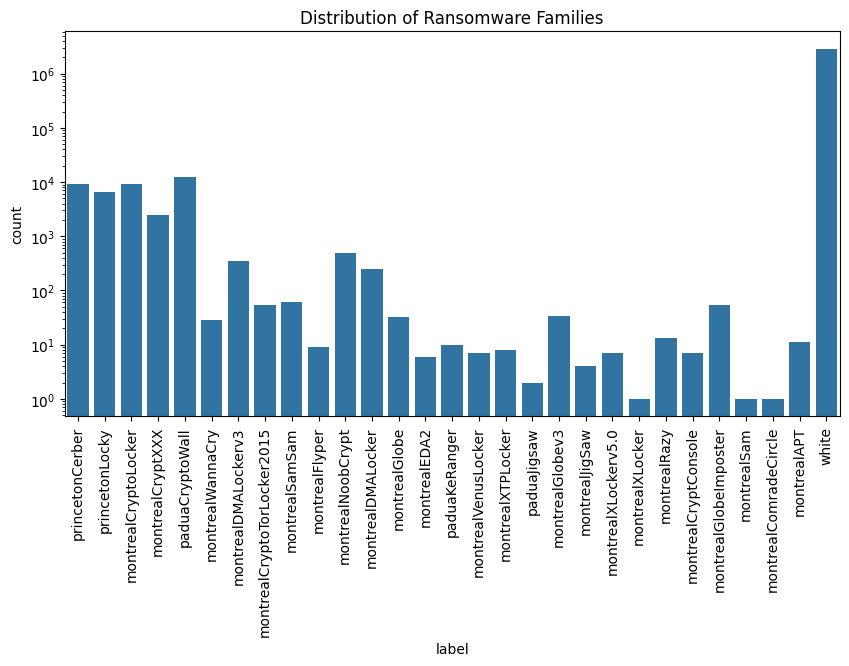

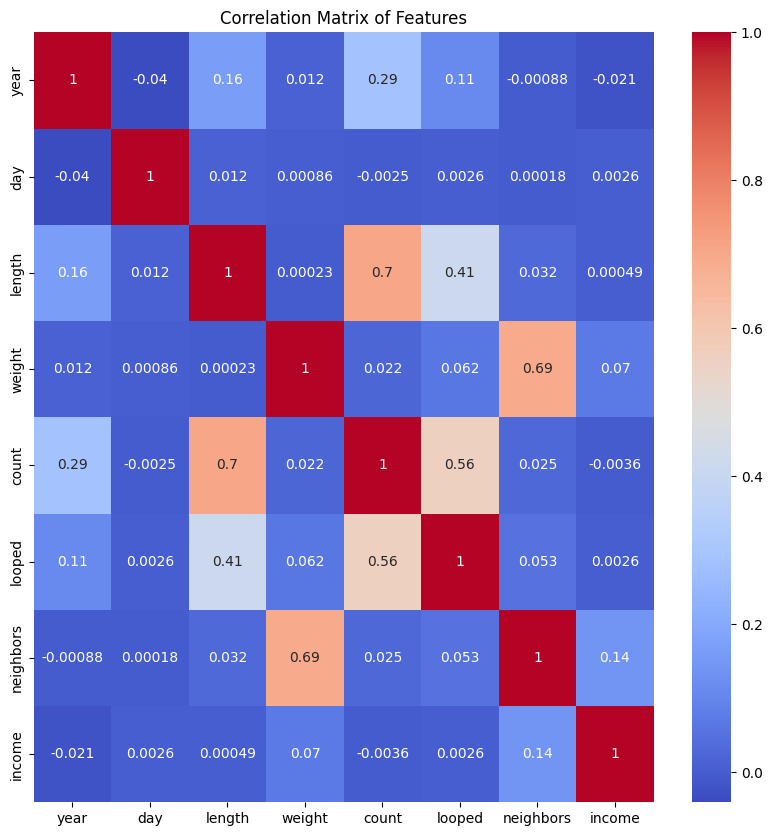

In [8]:
# Check the distribution of ransomware families
predictor_variables = ['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income']
correlation_matrix = df[predictor_variables].corr()

df2 = df.copy()
df2['count'] = np.log1p(df['count'])
plt.figure(figsize=(10,5))
sns.countplot(data=df2, x='label')
plt.title('Distribution of Ransomware Families')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

df2=df2.drop(['address','label'],axis=1)
df1=df2.corr()

# Check the correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

<h1>Data Pre-processing:</h1>

Data Analysis

In [9]:
predictor_variables = ['year', 'day', 'length', 'weight', 'count', 'looped', 'neighbors', 'income']
correlation_matrix = df[predictor_variables].corr()
X = df[predictor_variables]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

    Variable       VIF
0       year  0.000006
1        day  1.000255
2     length  1.987532
3     weight  1.928872
4      count  2.400960
5     looped  1.464397
6  neighbors  1.954434
7     income  1.021909


Handling missing data

In [10]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


Label Encoding

In [11]:
# Label encoding for 'address' feature
le = preprocessing.LabelEncoder()
df['address'] = le.fit_transform(df['address'])

# family categories
df.loc[df['label'].str.startswith("m"),'label']="Montreal"
df.loc[df['label'].str.startswith("pa"),'label']="Panuda"
df.loc[df['label'].str.startswith("pr"),'label']="Princeton"
df.loc[df['label'].str.startswith("w"),'label']="White"

# Encode target labels with value between 0 and n_classes-1
le = preprocessing.LabelEncoder()
df['label'] = le.fit_transform(df['label'])

for class_, label in enumerate(le.classes_):
    print(f'The label {label} is encoded as {class_}')

The label Montreal is encoded as 0
The label Panuda is encoded as 1
The label Princeton is encoded as 2
The label White is encoded as 3


In [12]:
class_distribution = df['label'].value_counts()
print(class_distribution)

label
3    2875284
2      15848
0      13163
1      12402
Name: count, dtype: int64


New Feature Construction

In [13]:
# Constructing new feature: n_address_feature
df['n_address_feature'] = df.groupby('address')['address'].transform('count')
df

,address,year,day,length,weight,count,looped,neighbors,income,label,n_address_feature
0,23,2017,11,18,0.008333,1,0,2,1.000500e+08,2,1
1,128,2016,132,44,0.000244,1,0,1,1.000000e+08,2,1
2,169,2016,246,0,1.000000,1,0,2,2.000000e+08,2,1
3,217,2016,322,72,0.003906,1,0,2,7.120000e+07,2,1
4,293,2016,238,144,0.072848,456,0,1,2.000000e+08,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2916692,30849,2018,330,0,0.111111,1,0,1,1.255809e+09,3,1
2916693,2192574,2018,330,0,1.000000,1,0,1,4.409699e+07,3,1
2916694,1824270,2018,330,2,12.000000,6,6,35,2.398267e+09,3,7
2916695,389289,2018,330,0,0.500000,1,0,1,1.780427e+08,3,1


In [14]:
# Constructing new feature: quarter_number
def day_to_quarter(day):
    if day <= 90:
        return 1
    elif day <= 181:
        return 2
    elif day <= 273:
        return 3
    else:
        return 4

df['quarter_number'] = df['day'].apply(day_to_quarter)
df


,address,year,day,length,weight,count,looped,neighbors,income,label,n_address_feature,quarter_number
0,23,2017,11,18,0.008333,1,0,2,1.000500e+08,2,1,1
1,128,2016,132,44,0.000244,1,0,1,1.000000e+08,2,1,2
2,169,2016,246,0,1.000000,1,0,2,2.000000e+08,2,1,3
3,217,2016,322,72,0.003906,1,0,2,7.120000e+07,2,1,4
4,293,2016,238,144,0.072848,456,0,1,2.000000e+08,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2916692,30849,2018,330,0,0.111111,1,0,1,1.255809e+09,3,1,4
2916693,2192574,2018,330,0,1.000000,1,0,1,4.409699e+07,3,1,4
2916694,1824270,2018,330,2,12.000000,6,6,35,2.398267e+09,3,7,4
2916695,389289,2018,330,0,0.500000,1,0,1,1.780427e+08,3,1,4


In [15]:
# Constructing new feature: is_close_to_holiday
public_holidays = [1, 15, 53, 105, 151, 185, 121, 285, 315, 330, 331, 335, 360]
#     1, # New Year’s Day, January 1
#     15, # Birthday of Martin Luther King, Jr, 15 January
#     53, # Washington's birthday February 22
#     105, # Tax Day, April 15
#     151, # Memorial day, May 31
#     185, # Independence day, July 4
#     121, # Labor day, May 1
#     285, # Columbus day, October 12
#     315, # Veteran's day, November 11
#     330, # Thanksgiving day, November 26
#     331, # Black Friday, day after Thanksgiving
#     335, # Cyber Monday, Monday after Thanksgiving
#     360, # Christmas day, December 25

def is_close_to_holiday(holiday, day):
    return abs(holiday - day) <= 7

df['is_close_to_holiday'] = df['day'].apply(lambda day: any(is_close_to_holiday(holiday, day) for holiday in public_holidays))

def get_day_of_week(year, day_of_year):
    # Convert the year and day_of_year into a datetime object
    first_day_of_year = datetime(int(year), 1, 1)
    # Subtract 1 because day_of_year starts at 1
    transaction_date = first_day_of_year + timedelta(days=int(day_of_year)-1)
    # Return the day of the week (0 is Monday, 6 is Sunday)
    return transaction_date.weekday()

df['day_of_week'] = df.apply(lambda row: get_day_of_week(row['year'], row['day']), axis=1)


# epsilon is used to avoid 0
epsilon = 1e-10 
df['average_income_per_transaction'] = df.groupby('address')['income'].transform('mean')
df['transaction_count'] = df.groupby('address')['count'].transform('count')
df['looped_ratio'] = df['looped'] / (df['transaction_count'] + epsilon)
df['merge_behavior'] = df['weight'] / (df['count'] + epsilon)
df['cybercrime_related'] = ((df['looped_ratio'] > 0.5) & (df['merge_behavior'] > 0.5)).astype(int)
df['length_weight'] = df['length'] * df['weight']
df['count_looped'] = df['count'] * df['looped']
df['month'] = df['day'] // 30
df['week'] = df['day'] // 7
df['total_volume'] = df.groupby('address')['income'].transform('sum')
df['average_volume'] = df.groupby('address')['income'].transform('mean')
df['transaction_frequency'] = df.groupby('address')['count'].transform('sum')

# Get a list of all columns in df
all_columns = df.columns.tolist()

# Remove the 'label' column if it's not appropriate for clustering
if 'label' in all_columns:
    all_columns.remove('label')

# Now all_columns contains all features
features = df[all_columns]

print(df)

         address  year  day  length     weight  count  looped  neighbors  \
0             23  2017   11      18   0.008333      1       0          2   
1            128  2016  132      44   0.000244      1       0          1   
2            169  2016  246       0   1.000000      1       0          2   
3            217  2016  322      72   0.003906      1       0          2   
4            293  2016  238     144   0.072848    456       0          1   
...          ...   ...  ...     ...        ...    ...     ...        ...   
2916692    30849  2018  330       0   0.111111      1       0          1   
2916693  2192574  2018  330       0   1.000000      1       0          1   
2916694  1824270  2018  330       2  12.000000      6       6         35   
2916695   389289  2018  330       0   0.500000      1       0          1   
2916696  2580865  2018  330     144   0.073972   6800       0          2   

               income  label  ...  looped_ratio  merge_behavior  \
0        1.000500e+0

K-Means Elbow

In [16]:
# Perform clustering
kmeans = KMeans(n_clusters=3,n_init=10,random_state=0).fit(features)

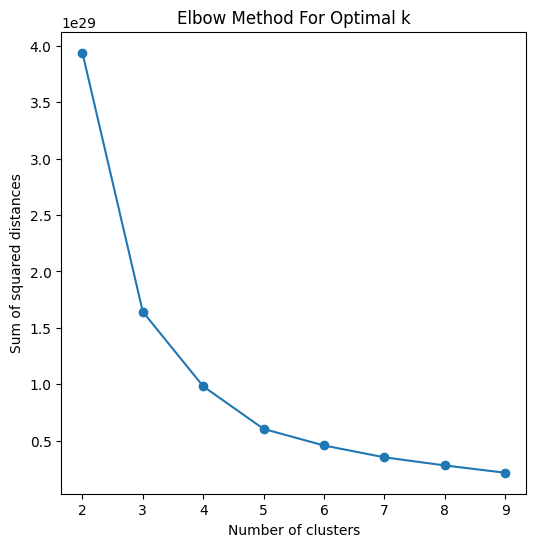

In [17]:
# Calculate the sum of squared distances (SSD) for different numbers of clusters
ssd = []
for k in range(2, 10):  # change the range as needed
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0).fit(features)
    ssd.append(kmeans.inertia_)

# Plot SSD against k
plt.figure(figsize=(6, 6))
plt.plot(range(2, 10), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [18]:
#From the graph, 3 is optimal
kmeans = KMeans(n_clusters=3,n_init=10,random_state=0).fit(features)
df['cluster'] = kmeans.labels_

In [19]:
print(df.cluster.value_counts())
df

cluster
0    2916611
1         56
2         30
Name: count, dtype: int64


,address,year,day,length,weight,count,looped,neighbors,income,label,...,merge_behavior,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster
0,23,2017,11,18,0.008333,1,0,2,1.000500e+08,2,...,0.008333,0,0.150000,0,0,1,1.000500e+08,1.000500e+08,1,0
1,128,2016,132,44,0.000244,1,0,1,1.000000e+08,2,...,0.000244,0,0.010742,0,4,18,1.000000e+08,1.000000e+08,1,0
2,169,2016,246,0,1.000000,1,0,2,2.000000e+08,2,...,1.000000,0,0.000000,0,8,35,2.000000e+08,2.000000e+08,1,0
3,217,2016,322,72,0.003906,1,0,2,7.120000e+07,2,...,0.003906,0,0.281250,0,10,46,7.120000e+07,7.120000e+07,1,0
4,293,2016,238,144,0.072848,456,0,1,2.000000e+08,2,...,0.000160,0,10.490171,0,7,34,2.000000e+08,2.000000e+08,456,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916692,30849,2018,330,0,0.111111,1,0,1,1.255809e+09,3,...,0.111111,0,0.000000,0,11,47,1.255809e+09,1.255809e+09,1,0
2916693,2192574,2018,330,0,1.000000,1,0,1,4.409699e+07,3,...,1.000000,0,0.000000,0,11,47,4.409699e+07,4.409699e+07,1,0
2916694,1824270,2018,330,2,12.000000,6,6,35,2.398267e+09,3,...,2.000000,1,24.000000,36,11,47,5.344682e+10,7.635260e+09,84,0
2916695,389289,2018,330,0,0.500000,1,0,1,1.780427e+08,3,...,0.500000,0,0.000000,0,11,47,1.780427e+08,1.780427e+08,1,0


In [20]:
# Move the label column to the end
label = df['label']
df = df.drop(columns=['label'])
df['label'] = label

Outlier Removal

In [21]:
# Define a threshold for the Z-score method
z_threshold = 3

# Create a new DataFrame with only the numerical columns excluding the label
numerical_df = df.drop(columns=['label']).select_dtypes(include=[np.number])

# Calculate the Z-score for each data point
z_scores = np.abs((numerical_df - numerical_df.mean()) / numerical_df.std())

#Values
print("Z-score: ",z_scores)
print("Z-threshold: ",z_threshold)

# Identify outliers based on the threshold
outliers = numerical_df[(z_scores > z_threshold).any(axis=1)]

# Remove outliers from the dataset
df = df[(z_scores <= z_threshold).all(axis=1)].copy()

#After outlier removal
df['label'].value_counts()

Z-score:            address      year       day    length    weight     count    looped  \
0        1.729687  1.118540  1.638825  0.457910  0.146203  0.426499  0.246819   
1        1.729549  0.675552  0.475496  0.017100  0.148404  0.426499  0.246819   
2        1.729494  0.675552  0.620533  0.763086  0.123693  0.426499  0.246819   
3        1.729431  0.675552  1.351219  0.457618  0.147408  0.426499  0.246819   
4        1.729331  0.675552  0.543619  1.678322  0.128644  0.157216  0.246819   
...           ...       ...       ...       ...       ...       ...       ...   
2916692  1.688956  1.561528  1.428134  0.763086  0.118230  0.426499  0.246819   
2916693  1.167364  1.561528  1.428134  0.763086  0.123693  0.426499  0.246819   
2916694  0.680718  1.561528  1.428134  0.729177  3.117497  0.423540  0.240610   
2916695  1.215344  1.561528  1.428134  0.763086  0.012389  0.426499  0.246819   
2916696  1.680419  1.561528  1.428134  1.678322  0.128338  3.597350  0.246819   

         neighbor

label
3    2671631
2      15256
1       8099
0       6917
Name: count, dtype: int64

Normalization

In [22]:
# Create a PowerTransformer instance
pt = PowerTransformer(method='yeo-johnson')

# Select numerical columns excluding the label
numerical_cols = df.select_dtypes(include=[np.number]).drop(columns=['label']).columns
numerical_cols

Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'day_of_week', 'average_income_per_transaction', 'transaction_count',
       'looped_ratio', 'merge_behavior', 'cybercrime_related', 'length_weight',
       'count_looped', 'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency', 'cluster'],
      dtype='object')

In [23]:
# Apply the power transformation to numerical columns
df[numerical_cols] = pt.fit_transform(df[numerical_cols])

Scaling

In [24]:
# Feature scaling for all numerical features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Export CSV File

In [25]:
df.to_csv('./data/BitcoinHeistDataPreProcessed.csv',index=False)

In [26]:
df=pd.read_csv('./data/BitcoinHeistDataPreProcessed.csv')

Handle Class Imbalance

In [27]:
# Get the count of the majority class
majority_class_count = df['label'].value_counts().max()

# Calculate the desired number of samples for each minority class - 0/7 percent of majority class
desired_samples = int(majority_class_count * 0.007)

# Define the class distribution for oversampling and undersampling
over_sampling_strategy = {0: desired_samples, 1: desired_samples, 2: desired_samples}
under_sampling_strategy = {3: desired_samples}

# Define oversampling and undersampling
over = SMOTE(sampling_strategy=over_sampling_strategy)
under = RandomUnderSampler(sampling_strategy=under_sampling_strategy)

# Define pipeline
pipeline = Pipeline([('SMOTE', over), ('RandomUnderSampler', under)])

# Apply the pipeline to the data
X, y = pipeline.fit_resample(df.drop('label', axis=1), df['label'])


Data Split

In [28]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Feature Selection

Original features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'is_close_to_holiday', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'merge_behavior',
       'cybercrime_related', 'length_weight', 'count_looped', 'month', 'week',
       'total_volume', 'average_volume', 'transaction_frequency', 'cluster'],
      dtype='object')
Selected features: Index(['address', 'year', 'day', 'weight', 'neighbors', 'income',
       'n_address_feature', 'quarter_number', 'day_of_week',
       'average_income_per_transaction', 'transaction_count', 'merge_behavior',
       'length_weight', 'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Not selected features: Index(['length', 'count', 'looped', 'is_close_to_holiday', 'looped_ratio',
       'cybercrime_related', 'count_looped', 'cluster'],
      dty

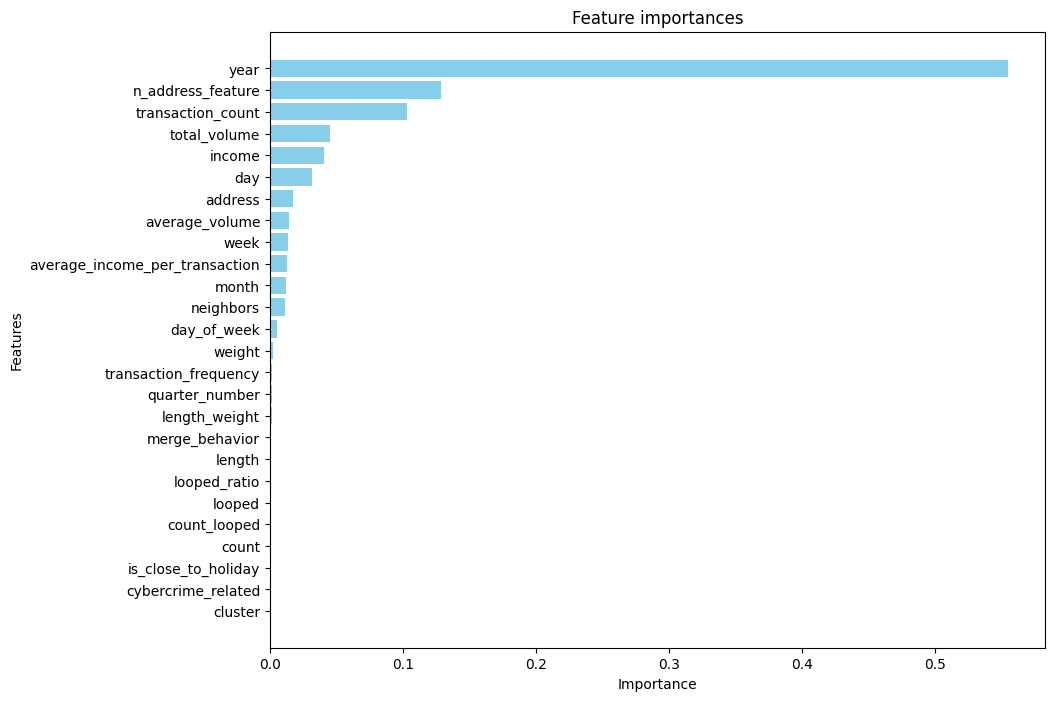

In [29]:
# Feature selection
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)  # Fit on the training data

# Print the feature names before selection
original_feature_names = X_train.columns  # Get feature names from the training data
print('Original features: {}'.format(original_feature_names))

# Get feature importances
importances = gb.feature_importances_

# Create a boolean mask of features selected by the model
mask = importances > 0.001  # adjust threshold as needed

# Apply the mask to the feature dataset
X_train_new = X_train.loc[:, mask]  # Apply mask to the training data
X_test_new = X_test.loc[:, mask]  # Apply the same mask to the testing data

# Print the selected feature names
selected_feature_names = X_train_new.columns
print('Selected features: {}'.format(selected_feature_names))

# Print the features that are not selected
not_selected_feature_names = original_feature_names[~mask]
print('Not selected features: {}'.format(not_selected_feature_names))

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': original_feature_names, 'importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances with feature names
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

In [30]:
# Create copies of the original X_train and X_test
X_train_initial = X_train.copy()
X_test_initial = X_test.copy()

[I 2024-04-11 16:58:12,754] A new study created in memory with name: no-name-d17d602f-12fa-407e-b0a2-b48c0e120831


Original features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'is_close_to_holiday', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'merge_behavior',
       'cybercrime_related', 'length_weight', 'count_looped', 'month', 'week',
       'total_volume', 'average_volume', 'transaction_frequency', 'cluster'],
      dtype='object')
[1.74348473e-02 5.54560197e-01 3.18335842e-02 7.06901388e-04
 2.24458367e-03 2.41385312e-05 2.42445765e-04 1.13224221e-02
 4.00054869e-02 1.30346254e-01 1.49976386e-03 4.94416437e-06
 5.37244129e-03 1.57189554e-02 1.01365509e-01 6.52809459e-04
 1.05042569e-03 0.00000000e+00 1.20426046e-03 4.26521384e-04
 1.17299668e-02 1.33814181e-02 4.50414919e-02 1.20419708e-02
 1.78866122e-03 0.00000000e+00]


[I 2024-04-11 16:59:08,805] Trial 0 finished with value: 0.9340170352545739 and parameters: {'threshold': 0.007347184967030593}. Best is trial 0 with value: 0.9340170352545739.
[I 2024-04-11 17:00:06,947] Trial 1 finished with value: 0.9353920782246667 and parameters: {'threshold': 0.0022449891715260696}. Best is trial 1 with value: 0.9353920782246667.
[I 2024-04-11 17:00:59,359] Trial 2 finished with value: 0.9340170352545739 and parameters: {'threshold': 0.009278399560598411}. Best is trial 1 with value: 0.9353920782246667.
[I 2024-04-11 17:02:03,851] Trial 3 finished with value: 0.9364424582712654 and parameters: {'threshold': 0.0017362850936716568}. Best is trial 3 with value: 0.9364424582712654.
[I 2024-04-11 17:02:56,620] Trial 4 finished with value: 0.9341889156258355 and parameters: {'threshold': 0.005776959272792595}. Best is trial 3 with value: 0.9364424582712654.
[I 2024-04-11 17:03:52,191] Trial 5 finished with value: 0.9353920782246667 and parameters: {'threshold': 0.00248

Best threshold: 2.3907611886128232e-05
Best score: 0.938619609640579
Selected features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'day_of_week', 'average_income_per_transaction', 'transaction_count',
       'looped_ratio', 'merge_behavior', 'length_weight', 'count_looped',
       'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Not selected features: Index(['is_close_to_holiday', 'cybercrime_related', 'cluster'], dtype='object')


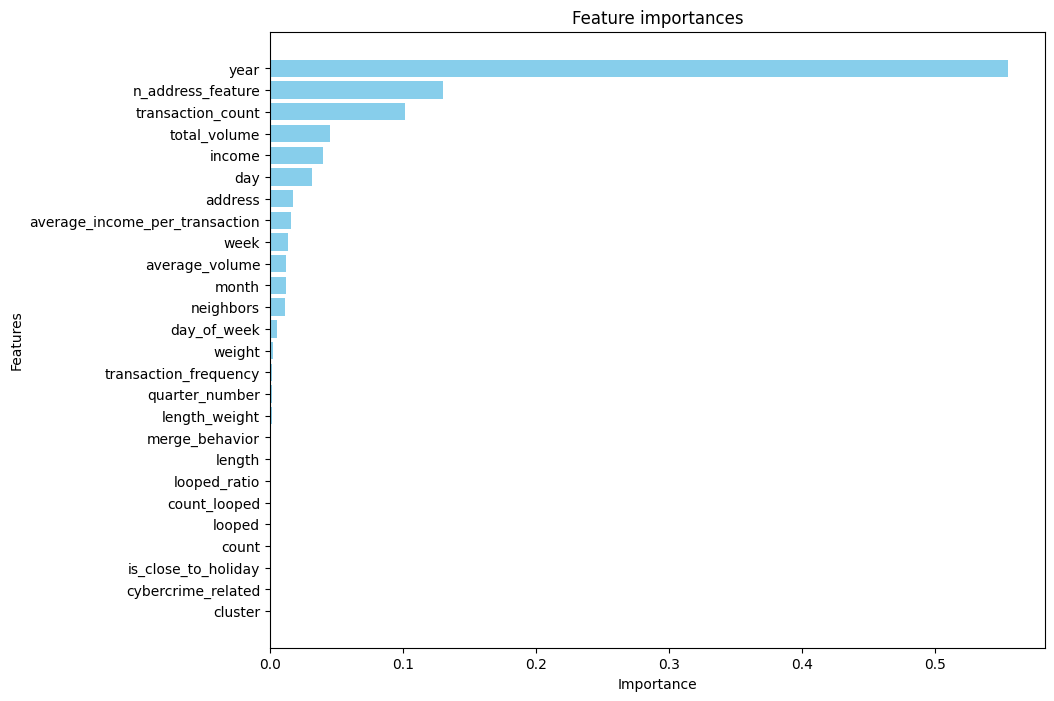

In [31]:
# Feature selection
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)  # Fit on the training data

# Print the feature names before selection
original_feature_names = X_train.columns  # Get feature names from the training data
print('Original features: {}'.format(original_feature_names))

# Get feature importances
importances = gb.feature_importances_

print(importances)

# Define an objective function to be minimized.
def objective(trial, X_train, y_train):
    # Suggest a threshold for the feature selection
    threshold = trial.suggest_float('threshold', 0, 0.01)

    # Create a mask for the current threshold
    mask = importances > threshold

    # Apply the mask to the training data
    X_train_new = X_train.loc[:, mask]
    
    # If all features are filtered out, return a large negative value
    if X_train_new.empty:
        return -1e9
    
    # Fit the model and evaluate its performance
    gb.fit(X_train_new, y_train)
    score = gb.score(X_train_new, y_train)

    # Return the score
    return score

# Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=30)

# Get the best trial
best_trial = study.best_trial

print('Best threshold: {}'.format(best_trial.params['threshold']))
print('Best score: {}'.format(best_trial.value))

# Apply the best threshold to the feature dataset
mask = importances > best_trial.params['threshold']
X_train_new = X_train.loc[:, mask]  # Apply mask to the training data
X_test_new = X_test.loc[:, mask]  # Apply the same mask to the testing data

# Print the selected feature names
selected_feature_names = X_train_new.columns
print('Selected features: {}'.format(selected_feature_names))

# Print the features that are not selected
not_selected_feature_names = original_feature_names[~mask]
print('Not selected features: {}'.format(not_selected_feature_names))

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': original_feature_names, 'importance': importances})

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Plot feature importances with feature names
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importances")
plt.gca().invert_yaxis()  # Reverse the order of features
plt.show()

In [32]:
# Transfer X_train_new to X_train
X_train = X_train_new.copy()

# Transfer X_test_new to X_test
X_test = X_test_new.copy()

# Update the feature names to match the selected features
selected_feature_names = X_train.columns
print('Updated X_train with selected features: {}'.format(selected_feature_names))

selected_feature_names = X_test.columns
print('Updated X_test with selected features: {}'.format(selected_feature_names))

Updated X_train with selected features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'day_of_week', 'average_income_per_transaction', 'transaction_count',
       'looped_ratio', 'merge_behavior', 'length_weight', 'count_looped',
       'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Updated X_test with selected features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'day_of_week', 'average_income_per_transaction', 'transaction_count',
       'looped_ratio', 'merge_behavior', 'length_weight', 'count_looped',
       'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')


XG Boost

In [33]:
# Define the model
xg = XGBClassifier()

# Fit the model
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy of XGBoost: 0.9584261652259157
Prediction time: 0.02500009536743164 seconds
Precision of XGBoost: 0.9587942563992911
Recall of XGBoost: 0.9584261652259157
F1-score of XGBoost: 0.9581846615948502
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5559
           1       0.98      0.99      0.98      5690
           2       0.93      0.98      0.95      5543
           3       0.96      0.90      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



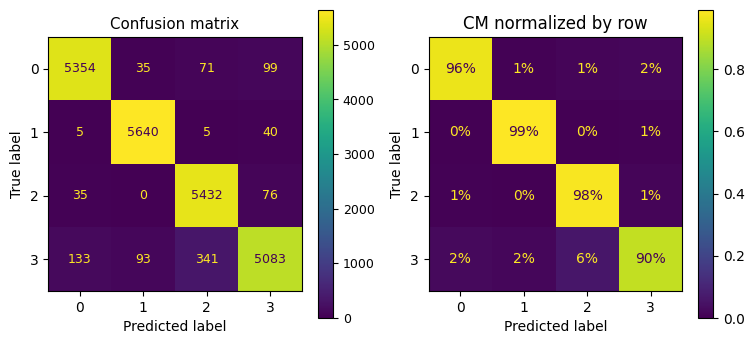

<Figure size 640x480 with 0 Axes>

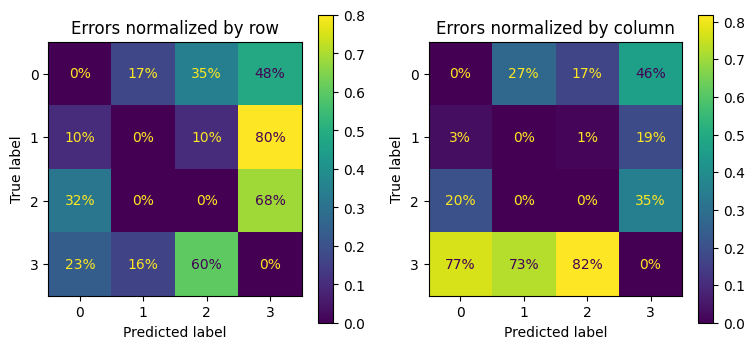

In [34]:
xg_score=xg.score(X_test,y_test)

start_time = time.time()
y_predict=xg.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of XGBoost: '+ str(xg_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

plt.clf()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0],
                                        sample_weight=sample_weight,   
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)


In [35]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Define the model
xg = XGBClassifier()

# Define the hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function with cross validation
def objective(trial):
    params = {
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, 10]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200, 300]),
        'gamma': trial.suggest_float('gamma', 0, 0.2),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [1, 5, 10]),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    xg = XGBClassifier(**params)
    scores = cross_val_score(xg, X_train, y_train, cv=5)
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=30)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
xg_opt = XGBClassifier(**best_params)
xg_opt.fit(X_train, y_train)

# Save the model to a file
pickle.dump(xg_opt, open("xgboost_optuna_model.pkl", "wb"))

[I 2024-04-11 18:38:03,002] A new study created in memory with name: no-name-9d70a824-f686-4872-9ec8-c3017b161e23
[I 2024-04-11 18:38:25,138] Trial 0 finished with value: 0.95802300972992 and parameters: {'max_depth': 10, 'learning_rate': 0.2867068067589546, 'n_estimators': 300, 'gamma': 0.10129145307760917, 'min_child_weight': 5, 'subsample': 0.5200571064350501, 'colsample_bytree': 0.7187964148329671}. Best is trial 0 with value: 0.95802300972992.
[I 2024-04-11 18:38:54,120] Trial 1 finished with value: 0.9602192352162865 and parameters: {'max_depth': 10, 'learning_rate': 0.1224289284528671, 'n_estimators': 300, 'gamma': 0.04090602877380032, 'min_child_weight': 5, 'subsample': 0.7950520130429056, 'colsample_bytree': 0.5241267634208349}. Best is trial 1 with value: 0.9602192352162865.
[I 2024-04-11 18:39:25,851] Trial 2 finished with value: 0.9596081035471402 and parameters: {'max_depth': 10, 'learning_rate': 0.08830271151475584, 'n_estimators': 300, 'gamma': 0.18691139327619757, 'min_

Best score: 0.9605057207383357

Optimized parameters: {'max_depth': 10, 'learning_rate': 0.09828967177354501, 'n_estimators': 300, 'gamma': 0.02377774789383358, 'min_child_weight': 1, 'subsample': 0.8558114700365569, 'colsample_bytree': 0.6277598937632782}



Accuracy of XGBoost: 0.9623028250601551
Prediction time: 0.11452698707580566 seconds
Precision of XGBoost: 0.9625529189764305
Recall of XGBoost: 0.9623028250601551
F1-score of XGBoost: 0.9621525190717878
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5559
           1       0.98      0.99      0.99      5690
           2       0.94      0.98      0.96      5543
           3       0.96      0.91      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



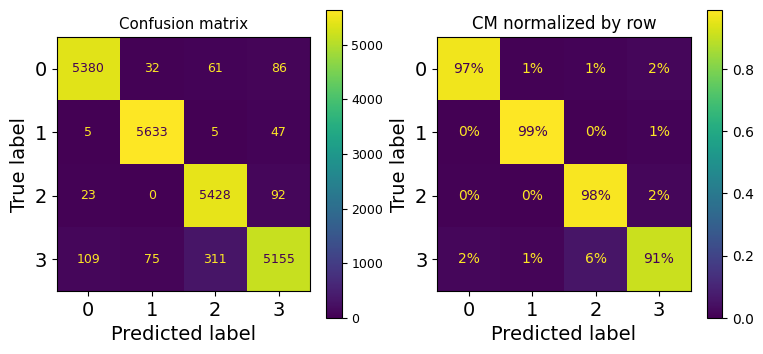

<Figure size 640x480 with 0 Axes>

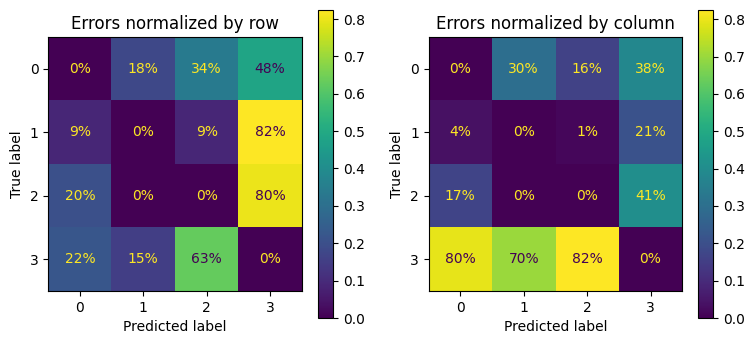

In [36]:
# Load the model from the file
xg_opt = pickle.load(open("xgboost_optuna_model.pkl", "rb"))

# Evaluation on the test set
xg_score=xg_opt.score(X_test,y_test)

start_time = time.time()
y_predict=xg_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of XGBoost: '+ str(xg_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

plt.clf()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)


Random Forest

In [37]:
# Define the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

start_time = time.time()
y_predict = rf.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

Accuracy of RandomForest: 0.9550396577845112
Prediction time: 0.33342623710632324 seconds
Precision of RandomForest: 0.9552945707176212
Recall of RandomForest: 0.9550396577845112
F1-score of RandomForest: 0.9548692581423959
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5559
           1       0.98      0.99      0.98      5690
           2       0.93      0.97      0.95      5543
           3       0.95      0.90      0.92      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.95     22442
weighted avg       0.96      0.96      0.95     22442



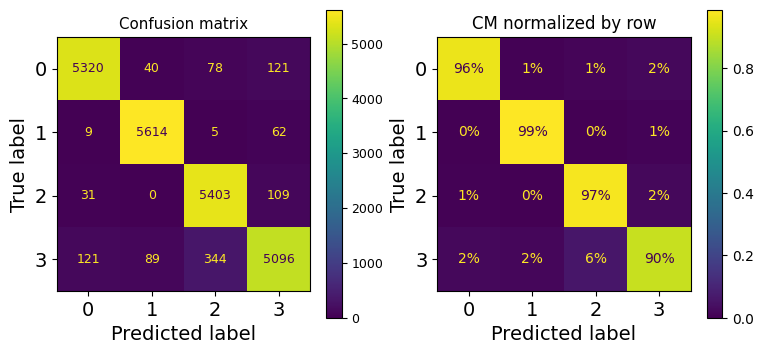

<Figure size 640x480 with 0 Axes>

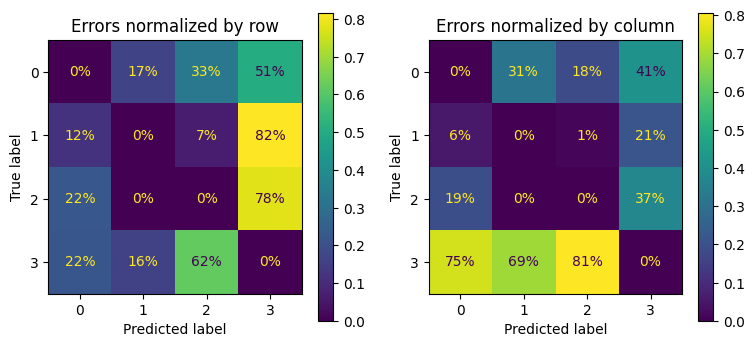

In [38]:
rf_score = rf.score(X_test, y_test)

print('Accuracy of RandomForest: '+ str(rf_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RandomForest: '+(str(precision)))
print('Recall of RandomForest: '+(str(recall)))
print('F1-score of RandomForest: '+(str(fscore)))
print(classification_report(y_true, y_predict))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

plt.clf()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        sample_weight=sample_weight,   
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)


In [39]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Define the model
rf = RandomForestClassifier()

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function with cross validation
def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400]),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    rf = RandomForestClassifier(**params)
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=30)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
rf_opt = RandomForestClassifier(**best_params)
rf_opt.fit(X_train, y_train)

# Save the model to a file
pickle.dump(rf_opt, open("randomforest_optuna_model.pkl", "wb"))

[I 2024-04-11 18:50:52,345] A new study created in memory with name: no-name-f6482532-84a5-414a-b7ed-80d6fdfabdb0
[I 2024-04-11 18:51:34,636] Trial 0 finished with value: 0.9470991104704687 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.9470991104704687.
[I 2024-04-11 18:53:40,708] Trial 1 finished with value: 0.9520645361344977 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 1 with value: 0.9520645361344977.
[I 2024-04-11 18:55:41,841] Trial 2 finished with value: 0.9470991122940674 and parameters: {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.9520645361344977.
[I 2024-04-11 18:56:23,423] Trial 3 finished with value: 0.949791885452913 and parameters: {'n_estimators': 100, 'max_depth': 40, '

Best score: 0.9527329415659912

Optimized parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}



Accuracy of RandomForest: 0.9544158274663577
Prediction time: 0.939300537109375 seconds
Precision of RandomForest: 0.9548188746205584
Recall of RandomForest: 0.9544158274663577
F1-score of RandomForest: 0.9542636243963792
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5559
           1       0.98      0.99      0.98      5690
           2       0.92      0.98      0.95      5543
           3       0.95      0.90      0.92      5650

    accuracy                           0.95     22442
   macro avg       0.95      0.95      0.95     22442
weighted avg       0.95      0.95      0.95     22442



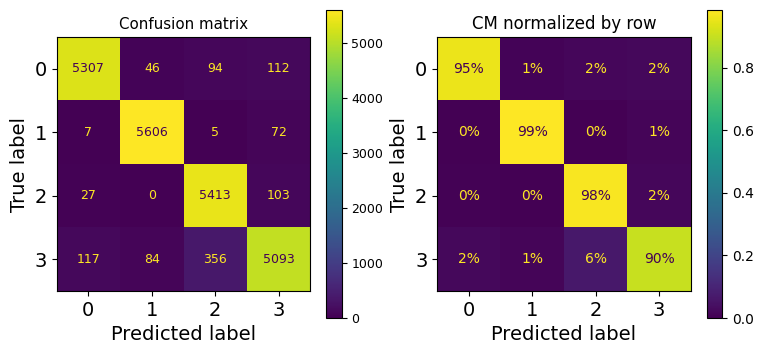

<Figure size 640x480 with 0 Axes>

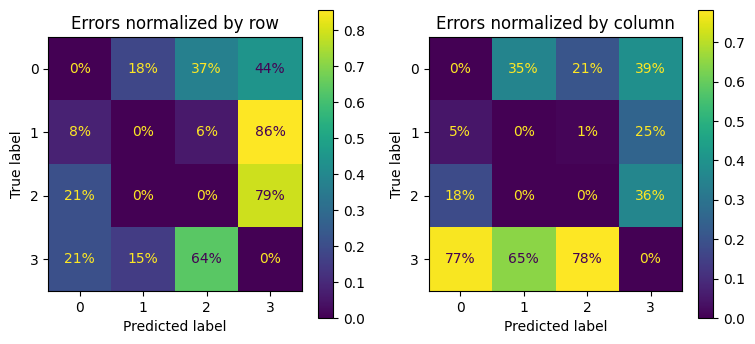

In [40]:
# Load the model from the file
rf_opt = pickle.load(open("randomforest_optuna_model.pkl", "rb"))

# Evaluation on the test set
rf_score = rf_opt.score(X_test, y_test)

start_time = time.time()
y_predict = rf_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of RandomForest: '+ str(rf_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RandomForest: '+(str(precision)))
print('Recall of RandomForest: '+(str(recall)))
print('F1-score of RandomForest: '+(str(fscore)))
print(classification_report(y_true, y_predict))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

plt.clf() 


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)


Decision Tree

In [41]:
# Define the model
dt = DecisionTreeClassifier()

# Fit the model
dt.fit(X_train, y_train)

start_time = time.time()
y_predict = dt.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

Accuracy of DecisionTree: 0.9348988503698422
Prediction time: 0.005008220672607422 seconds
Precision of DecisionTree: 0.9348192731806733
Recall of DecisionTree: 0.9348988503698422
F1-score of DecisionTree: 0.9348438433999257
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5559
           1       0.98      0.97      0.98      5690
           2       0.92      0.93      0.93      5543
           3       0.89      0.88      0.89      5650

    accuracy                           0.93     22442
   macro avg       0.93      0.93      0.93     22442
weighted avg       0.93      0.93      0.93     22442



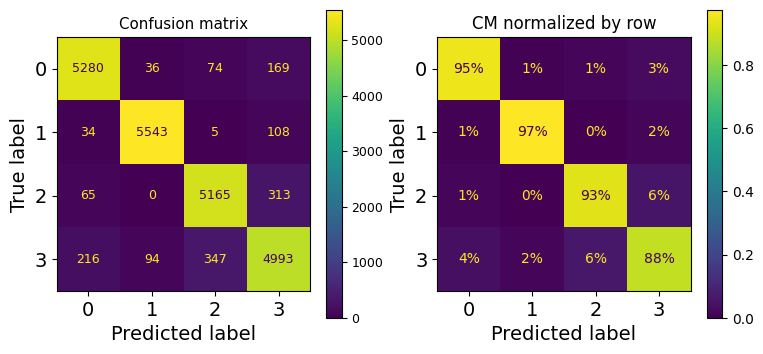

<Figure size 640x480 with 0 Axes>

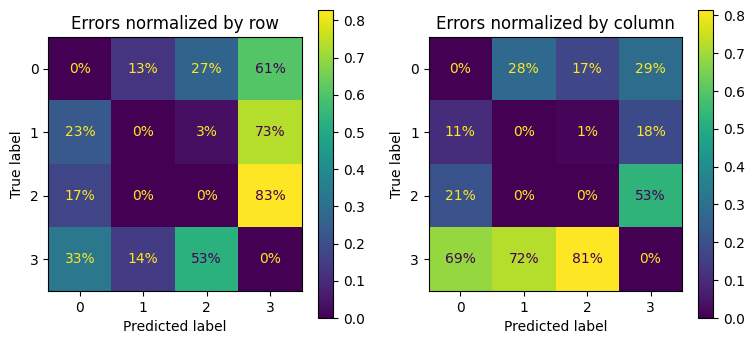

In [42]:
dt_score = dt.score(X_test, y_test)

print('Accuracy of DecisionTree: '+ str(dt_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DecisionTree: '+(str(precision)))
print('Recall of DecisionTree: '+(str(recall)))
print('F1-score of DecisionTree: '+(str(fscore)))
print(classification_report(y_true, y_predict))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

plt.clf()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)


In [43]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function with cross validation
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15)
    }
    dt = DecisionTreeClassifier(**params)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=30)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
dt_opt = DecisionTreeClassifier(**best_params)
dt_opt.fit(X_train, y_train)
# Save the model to a file
pickle.dump(dt_opt, open("decisiontree_optuna_model.pkl", "wb"))

[I 2024-04-11 19:49:43,726] A new study created in memory with name: no-name-73b643f6-3498-4035-a33b-c5a6087cd22f
[I 2024-04-11 19:49:47,100] Trial 0 finished with value: 0.9363660836330052 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9363660836330052.
[I 2024-04-11 19:49:47,615] Trial 1 finished with value: 0.9254613613368058 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 27, 'min_samples_split': 8, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9363660836330052.
[I 2024-04-11 19:49:47,871] Trial 2 finished with value: 0.8222759521245544 and parameters: {'criterion': 'gini', 'splitter': 'random', 'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.9363660836330052.
[I 2024-04-11 19:49:49,887] Trial 3 finished with value: 0.9077002783613901 and parameters: {'criterion': 'gini', 'splitter': 'best', 'ma

Best score: 0.9380658052132601

Optimized parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 16, 'min_samples_split': 10, 'min_samples_leaf': 7}



Accuracy of DecisionTree: 0.9387755102040817
Prediction time: 0.007063865661621094 seconds
Precision of DecisionTree: 0.9389123631294711
Recall of DecisionTree: 0.9387755102040817
F1-score of DecisionTree: 0.9384262376365344
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5559
           1       0.97      0.98      0.98      5690
           2       0.91      0.96      0.93      5543
           3       0.93      0.87      0.90      5650

    accuracy                           0.94     22442
   macro avg       0.94      0.94      0.94     22442
weighted avg       0.94      0.94      0.94     22442



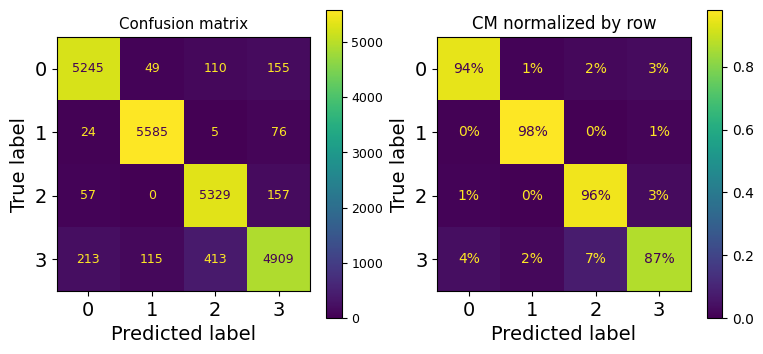

<Figure size 640x480 with 0 Axes>

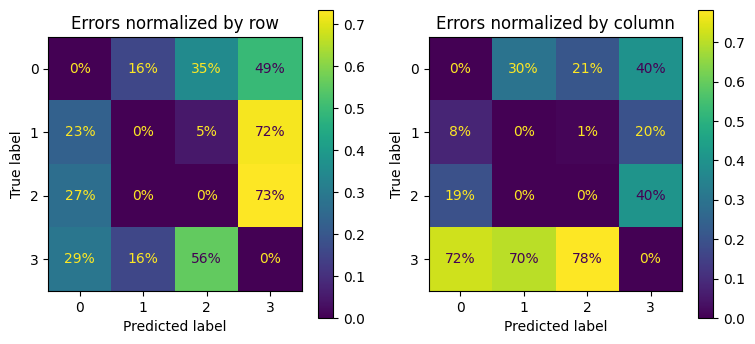

In [44]:
# Load the model from the file
dt_opt = pickle.load(open("decisiontree_optuna_model.pkl", "rb"))

# Evaluation on the test set
dt_score = dt_opt.score(X_test, y_test)
start_time = time.time()
y_predict = dt_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of DecisionTree: '+ str(dt_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DecisionTree: '+(str(precision)))
print('Recall of DecisionTree: '+(str(recall)))
print('F1-score of DecisionTree: '+(str(fscore)))
print(classification_report(y_true, y_predict))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()

plt.clf()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()

plt.rc('font', size=14)


In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

# Define the base models
rf = RandomForestClassifier()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()


# Define meta learner model
mlp = MLPClassifier(max_iter=200, verbose=True)

# Define the stacking ensemble
model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('dt', dt)], final_estimator=mlp, cv=5)

# Fit the model on our training data
model.fit(X_train, y_train)

start_time = time.time()
y_predict = model.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

Iteration 1, loss = 0.34566954
Iteration 2, loss = 0.13245646
Iteration 3, loss = 0.12920688
Iteration 4, loss = 0.12799509
Iteration 5, loss = 0.12743362
Iteration 6, loss = 0.12661624
Iteration 7, loss = 0.12577924
Iteration 8, loss = 0.12531417
Iteration 9, loss = 0.12482685
Iteration 10, loss = 0.12369269
Iteration 11, loss = 0.12303725
Iteration 12, loss = 0.12199846
Iteration 13, loss = 0.12123929
Iteration 14, loss = 0.12052232
Iteration 15, loss = 0.12009336
Iteration 16, loss = 0.11940919
Iteration 17, loss = 0.11894842
Iteration 18, loss = 0.11872944
Iteration 19, loss = 0.11833733
Iteration 20, loss = 0.11788861
Iteration 21, loss = 0.11730953
Iteration 22, loss = 0.11735437
Iteration 23, loss = 0.11703479
Iteration 24, loss = 0.11670479
Iteration 25, loss = 0.11643501
Iteration 26, loss = 0.11620178
Iteration 27, loss = 0.11623572
Iteration 28, loss = 0.11615247
Iteration 29, loss = 0.11599079
Iteration 30, loss = 0.11559622
Iteration 31, loss = 0.11550581
Iteration 32, los

Accuracy of StackingClassifier: 0.9612334016576063
Prediction time: 0.3769395351409912 seconds
Precision of StackingClassifier: 0.961466811413699
Recall of StackingClassifier: 0.9612334016576063
F1-score of StackingClassifier: 0.9610708900744616
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5559
           1       0.98      0.99      0.99      5690
           2       0.93      0.98      0.96      5543
           3       0.96      0.91      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



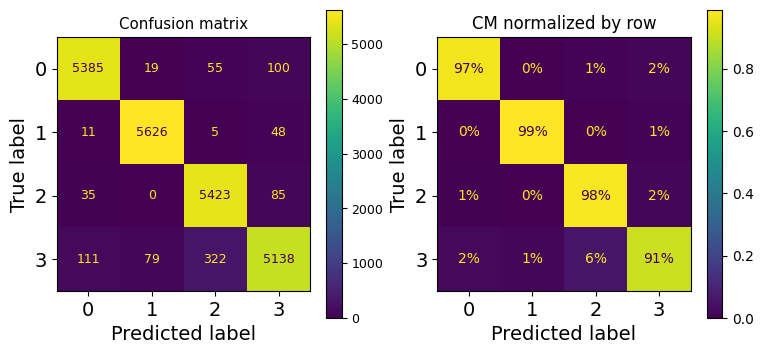

<Figure size 640x480 with 0 Axes>

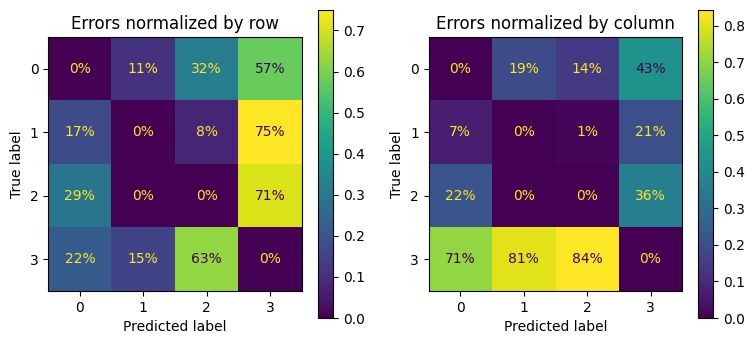

In [46]:
model_score = model.score(X_test, y_test)

print('Accuracy of StackingClassifier: '+ str(model_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of StackingClassifier: '+(str(precision)))
print('Recall of StackingClassifier: '+(str(recall)))
print('F1-score of StackingClassifier: '+(str(fscore)))
print(classification_report(y_true, y_predict))

# Part 1
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()
plt.clf()

# Part 2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
plt.rc('font', size=14)

In [47]:
import optuna
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the base models
rf = rf_opt
xgb = xg_opt
dt = dt_opt


# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function
def objective(trial):
    layer_sizes = trial.suggest_categorical('hidden_layer_sizes', ['50_50', '100'])
    layer_sizes = tuple(map(int, layer_sizes.split('_'))) if '_' in layer_sizes else int(layer_sizes)
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-1, log=True)
    
    # Define meta learner model with the suggested parameters
    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, alpha=alpha, learning_rate_init=learning_rate_init, max_iter=200)

    # Define the stacking ensemble with the new meta learner
    #('lb',lb)
    model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('dt', dt)], final_estimator=mlp, cv=5)

    # Perform cross validation and return the mean score
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean()  

# Run the optimization
study.optimize(objective, n_trials=10)  
##

# Get the best score and parameters
best_score = study.best_value
best_params = study.best_params

# Print the result
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Define the best model using the optimized parameters
layer_sizes = tuple(map(int, best_params['hidden_layer_sizes'].split('_'))) if '_' in best_params['hidden_layer_sizes'] else int(best_params['hidden_layer_sizes'])
mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, alpha=best_params['alpha'], learning_rate_init=best_params['learning_rate_init'], max_iter=200)
model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('dt', dt)], final_estimator=mlp, cv=5)

# Fit the model and evaluate it as before
model.fit(X_train, y_train)

# Save the model to a file
pickle.dump(model, open("stacking_optuna_model.pkl", "wb"))

[I 2024-04-11 19:52:45,610] A new study created in memory with name: no-name-cf2f6556-7941-41ee-a50e-1f53c72e6cf4
[I 2024-04-11 20:09:20,428] Trial 0 finished with value: 0.9581185170612606 and parameters: {'hidden_layer_sizes': '100', 'alpha': 0.0015611576037051823, 'learning_rate_init': 0.07996228395103049}. Best is trial 0 with value: 0.9581185170612606.
[I 2024-04-11 21:19:51,747] Trial 1 finished with value: 0.9594744319435542 and parameters: {'hidden_layer_sizes': '100', 'alpha': 0.022221709171377627, 'learning_rate_init': 0.04904249056206387}. Best is trial 1 with value: 0.9594744319435542.
[I 2024-04-11 21:34:41,835] Trial 2 finished with value: 0.9610595658799443 and parameters: {'hidden_layer_sizes': '100', 'alpha': 0.09411191296098245, 'learning_rate_init': 0.0009503517665343242}. Best is trial 2 with value: 0.9610595658799443.
[I 2024-04-11 23:29:01,217] Trial 3 finished with value: 0.9607540091633643 and parameters: {'hidden_layer_sizes': '100', 'alpha': 0.0092057789110555

Best score: 0.9611550622696932

Optimized parameters: {'hidden_layer_sizes': '100', 'alpha': 0.0061737330905757715, 'learning_rate_init': 0.00020895060055442114}



Accuracy of StackingClassifier: 0.962882096069869
Prediction time: 1.279412031173706 seconds
Precision of StackingClassifier: 0.9630331123947915
Recall of StackingClassifier: 0.962882096069869
F1-score of StackingClassifier: 0.9627774522528982
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5559
           1       0.98      0.99      0.99      5690
           2       0.94      0.98      0.96      5543
           3       0.95      0.92      0.94      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



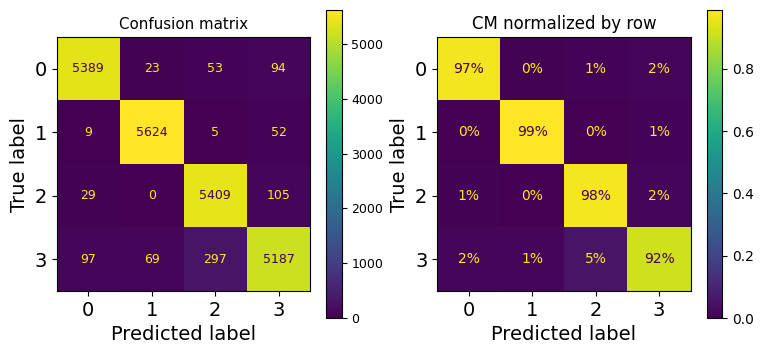

<Figure size 640x480 with 0 Axes>

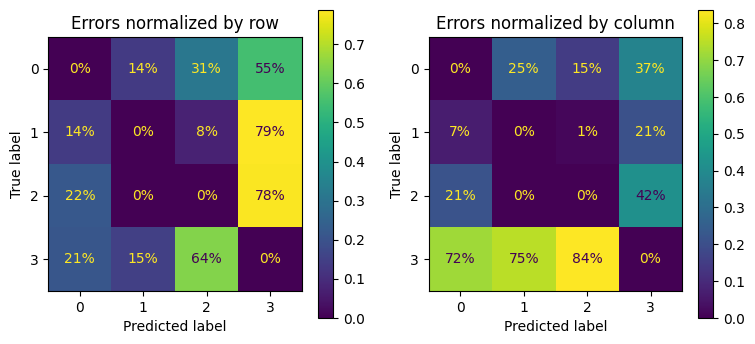

In [48]:
# Load the model from the file
model = pickle.load(open("stacking_optuna_model.pkl", "rb"))

# Evaluation on the test set
model_score = model.score(X_test, y_test)
start_time = time.time()
y_predict = model.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
y_true=y_test
sample_weight = (y_predict != y_true)

model_score = model.score(X_test, y_test)

print('Accuracy of StackingClassifier: '+ str(model_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of StackingClassifier: '+(str(precision)))
print('Recall of StackingClassifier: '+(str(recall)))
print('F1-score of StackingClassifier: '+(str(fscore)))
print(classification_report(y_true, y_predict))

# with PdfPages('StackingClassifier_Confusion_matrix_tuned.pdf') as pdf:
    # Part 1
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
axs[0].set_title("Confusion matrix")
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        normalize="true", values_format=".0%")
axs[1].set_title("CM normalized by row")
plt.show()
# pdf.savefig(fig)  # saves the current figure into a pdf page

plt.clf()  # clear the figure for the next plot

# Part 2
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                        sample_weight=sample_weight,    
                                        normalize="true", values_format=".0%")
axs[0].set_title("Errors normalized by row")
ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                        sample_weight=sample_weight,    
                                        normalize="pred", values_format=".0%")
axs[1].set_title("Errors normalized by column")
plt.show()
# pdf.savefig(fig)  # saves the current figure into a pdf page

plt.rc('font', size=14)  # make fonts great again
